<a href="https://colab.research.google.com/github/madhukar123456/Image-Classification-Transfer-Learning/blob/main/Artificial_Neural_Networks_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Checking tensorflow versions

In [ ]:
import tensorflow as tf
from tensorflow import keras
tf.__version__


'2.4.1'

In [ ]:
keras.__version__

'2.4.0'

# Building an image classifier using sequential API

Fashion MNIST. 70000 grayscale images of 28x28 pixels each, with 10 classes

In [ ]:
# Loading fashion MNIST
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full,y_train_full), (X_test, y_test) = fashion_mnist.load_data()
X_train_full.shape

4423680/4422102 [==============================] - 0s 0us/step


(60000, 28, 28)

In [ ]:
X_train_full.dtype

dtype('uint8')

In [ ]:
#Validation split
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000] , y_train_full[5000:]

In [ ]:
class_names = ["T-shirt/top","Trouser","Pullover", "Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [ ]:
class_names[y_train[1]]

'T-shirt/top'

In [ ]:
#Creating model using sequential API

model = keras.models.Sequential()                       #Creates sequential model
model.add(keras.layers.Flatten(input_shape=[28,28]))    #
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compiling the model 
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics="accuracy")


In [ ]:
# Training and evaluating the model
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid))

Epoch 1/50
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2277 - accuracy: 0.9195 - val_loss: 0.2977 - val_accuracy: 0.8898
Epoch 2/50
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2243 - accuracy: 0.9202 - val_loss: 0.3024 - val_accuracy: 0.8896
Epoch 3/50
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2200 - accuracy: 0.9213 - val_loss: 0.2900 - val_accuracy: 0.8916
Epoch 4/50
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2175 - accuracy: 0.9217 - val_loss: 0.3101 - val_accuracy: 0.8870
Epoch 5/50
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2147 - accuracy: 0.9228 - val_loss: 0.2910 - val_accuracy: 0.8932
Epoch 6/50
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2106 - accuracy: 0.9247 - val_loss: 0.3110 - val_accuracy: 0.8884
Epoch 7/50
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2061 - accuracy: 0.9264 - val_loss: 0.2962 - val_accuracy:

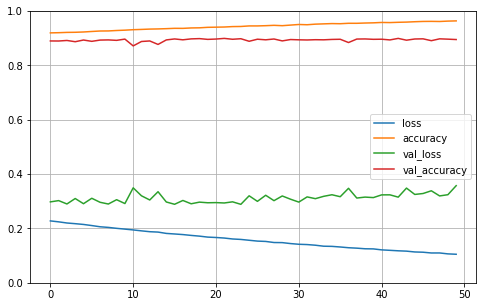

In [ ]:
# Plotting the learning curves
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) # Set the vertical range [0-1]
plt.show()


In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 107.8550 - accuracy: 0.8343


[107.85496520996094, 0.8342999815940857]

In [ ]:
# Using the model to make predictions
X_new = X_test[:10]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

# Building a Regression MLP Using the Sequential API


In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full,y_train_full)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [ ]:

model = keras.models.Sequential([
      keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
      keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="sgd")

history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3] # pretend these are new instances
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 2/20
363/363 [==============================] - 0s 893us/step - loss: nan - val_loss: nan
Epoch 3/20
363/363 [==============================] - 0s 908us/step - loss: nan - val_loss: nan
Epoch 4/20
363/363 [==============================] - 0s 987us/step - loss: nan - val_loss: nan
Epoch 5/20
363/363 [==============================] - 0s 887us/step - loss: nan - val_loss: nan
Epoch 6/20
363/363 [==============================] - 0s 929us/step - loss: nan - val_loss: nan
Epoch 7/20
363/363 [==============================] - 0s 897us/step - loss: nan - val_loss: nan
Epoch 8/20
363/363 [==============================] - 0s 914us/step - loss: nan - val_loss: nan
Epoch 9/20
363/363 [==============================] - 0s 916us/step - loss: nan - val_loss: nan
Epoch 10/20
363/363 [==============================] - 0s 862us/step - loss: nan - val_loss: nan
Epoch 11/20
363/363 [====================

# Building Complex models using functional API

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full,y_train_full)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [ ]:
y_test

array([1.422  , 1.667  , 1.221  , ..., 5.00001, 2.695  , 2.269  ])

In [ ]:
# Wide and Deep Neural Network
import tensorflow as tf
from tensorflow import keras

input = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input], outputs=[output])
model = keras.models.Model(inputs=[input], outputs=[output])

array([2.538  , 2.033  , 2.832  , 1.294  , 5.00001, 0.87   , 0.904  ,
       2.507  , 2.017  , 0.967  ])

In [ ]:
model.compile(loss="mean_squared_error", optimizer="sgd")

history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3] # pretend these are new instances
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: nan - val_loss: nan
Epoch 2/20
363/363 [==============================] - 0s 945us/step - loss: nan - val_loss: nan
Epoch 3/20
363/363 [==============================] - 0s 914us/step - loss: nan - val_loss: nan
Epoch 4/20
363/363 [==============================] - 0s 914us/step - loss: nan - val_loss: nan
Epoch 5/20
363/363 [==============================] - 0s 932us/step - loss: nan - val_loss: nan
Epoch 6/20
363/363 [==============================] - 0s 940us/step - loss: nan - val_loss: nan
Epoch 7/20
363/363 [==============================] - 0s 920us/step - loss: nan - val_loss: nan
Epoch 8/20
363/363 [==============================] - 0s 938us/step - loss: nan - val_loss: nan
Epoch 9/20
363/363 [==============================] - 0s 926us/step - loss: nan - val_loss: nan
Epoch 10/20
363/363 [==============================] - 0s 923us/step - loss: nan - val_loss: nan
Epoch 11/20
363/363 [====================